# Family Income and SAT scores

As you can see from the figure below, SAT scores and Median family income show a positive correlation.  Each data point represents a different university and is color-coded by the repayment rate.  Red represents high rates of repayment, while blue represent low rates of repayment. There are several important points that this graph reveals.

** Family Income and Repayment **

(1) Universities with low median family incomes have lower repayment rates.

(2) Repayment rates are good for wealthy families, regardless of the test scores from these students.

 These points above are obvious- your family income plays a large role in the ability to pay back student loans.

** Academic ability can Compensate **

(3) The real beauty of this graph lies in the universities that are made up of students with family incomes of around $40,000.  At these income levels SAT test scores start to play a large role in determining repayment rates.
This suggests that while family income is a predominant metric governing repayment, it's not the whole story.   A students academic ability can compensate. 

(4) A final interesting point in this graph is that you can directly observe the commitment of elite universities in accepting students who come from lower income families.  If you look at universities with the highest SAT scores, they are more biased towards lower income familes than the remainder of the colleges.

[Text(0,0.5,'Average SAT score'), Text(0.5,0,'Median Family Income')]

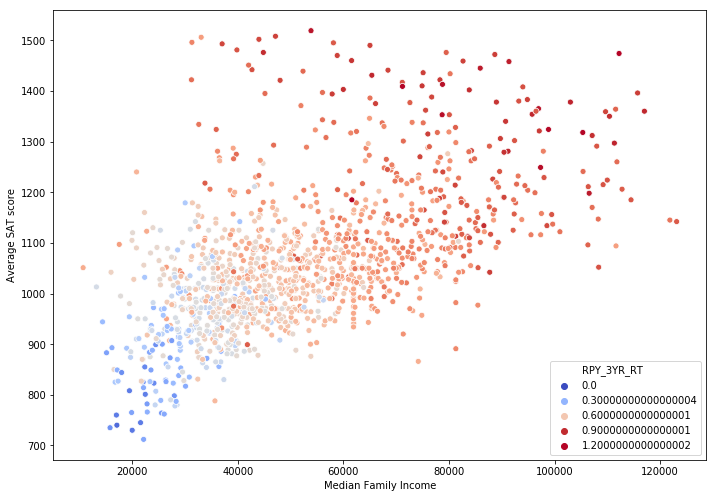

In [4]:
import os as os
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib as plt
# Download the data
import wget
import os as os
import zipfile
url_1 = 'https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip' 
url_2 = 'https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Treasury-Elements.csv'
def getdata(url):
    directory = os.getcwd()
    wget.download(url, directory)
    if url.endswith('.zip'):
        with zipfile.ZipFile("CollegeScorecard_Raw_Data.zip","r") as zip_ref:
            zip_ref.extractall(directory)
getdata(url_1)
scorecard_data = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2016_17_PP.csv',low_memory = False)
treasury_elements = pd.read_csv('Most-Recent-Cohorts-Treasury-Elements.csv')
%matplotlib inline
x = scorecard_data[['MD_FAMINC', 'RPY_3YR_RT', 'SAT_AVG']]
x = x.apply(pd.to_numeric, errors='coerce')
a4_dims = (11.7, 8.27)
fig, ax = plt.pyplot.subplots(figsize=a4_dims)
y = sns.scatterplot(x="MD_FAMINC", y="SAT_AVG", hue = "RPY_3YR_RT", palette= "coolwarm",  data=x)
y.set(xlabel='Median Family Income', ylabel='Average SAT score')

### Machine Learning

Finally I perform some Machine Learning and OLS regression to see how predictive family income and test scores are for repayment rate. Based solely on test scores and family income, My model returns an R-squared score (training): 0.704, and an R-squared score (test): 0.703.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy import stats

machine_learning_data = scorecard_data[['SAT_AVG','MD_FAMINC','RPY_3YR_RT']]
machine_learning_data = machine_learning_data.apply(pd.to_numeric, errors='coerce')
machine_learning_data = machine_learning_data.dropna()
X_loan = machine_learning_data[[ 'SAT_AVG', 'MD_FAMINC']]
y_loan = machine_learning_data['RPY_3YR_RT']
min_max_scaler = preprocessing.MinMaxScaler()
X_loan_minmax = min_max_scaler.fit_transform(X_loan)

est = sm.OLS(y_loan, X_loan_minmax).fit()
print(est.summary())


X_train, X_test, y_train, y_test = train_test_split(X_loan_minmax, y_loan,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))


from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train,y_train)
example = [[1600, 70000]]
example_scaled = min_max_scaler.transform(example)
model.predict(example_scaled)

                            OLS Regression Results                            
Dep. Variable:             RPY_3YR_RT   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 1.400e+04
Date:                Mon, 04 Feb 2019   Prob (F-statistic):               0.00
Time:                        09:04:14   Log-Likelihood:                 755.25
No. Observations:                1286   AIC:                            -1507.
Df Residuals:                    1284   BIC:                            -1496.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8756      0.022     40.053      0.0

array([0.95168889])